In [1]:
import MIMENet
import torch
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm
import json

In [2]:
#set path to simulation data
simulation_path = "/mnt/d/data/MIME_data/simData/dmMIME/highSpecies/expConditions"

In [3]:
#set training parameters
training_path = simulation_path+'/data/trainingData.txt'
epochs = 20
learning_rate = 0.00001
batch_size = 2**11
lambda_l1 = 0.00001
hidden_size_factor = 2
bottleneck = 1/2

In [4]:
model, history = MIMENet.train(training_path, epochs, learning_rate, batch_size, lambda_l1, hidden_size_factor, bottleneck, simulation_path+'/secondFromProt1/prot1/single_kds.txt')

Device: cuda:0
Epoch: 1/30


100%|██████████| 400/400 [00:00<00:00, 2364.49it/s]


Epoch: 2/30


100%|██████████| 400/400 [00:00<00:00, 2439.91it/s]


Epoch: 3/30


100%|██████████| 400/400 [00:00<00:00, 2427.68it/s]


Epoch: 4/30


100%|██████████| 400/400 [00:00<00:00, 2216.33it/s]


Epoch: 5/30


100%|██████████| 400/400 [00:00<00:00, 2394.96it/s]


Epoch: 6/30


100%|██████████| 400/400 [00:00<00:00, 2407.64it/s]


Epoch: 7/30


100%|██████████| 400/400 [00:00<00:00, 1765.19it/s]


Epoch: 8/30


100%|██████████| 400/400 [00:00<00:00, 2385.36it/s]


Epoch: 9/30


100%|██████████| 400/400 [00:00<00:00, 2256.77it/s]


Epoch: 10/30


100%|██████████| 400/400 [00:00<00:00, 2219.21it/s]


Epoch: 11/30


100%|██████████| 400/400 [00:00<00:00, 2821.00it/s]


Epoch: 12/30


100%|██████████| 400/400 [00:00<00:00, 1623.31it/s]


Epoch: 13/30


100%|██████████| 400/400 [00:00<00:00, 1253.84it/s]


Epoch: 14/30


100%|██████████| 400/400 [00:00<00:00, 1679.30it/s]


Epoch: 15/30


100%|██████████| 400/400 [00:00<00:00, 2841.69it/s]


Epoch: 16/30


100%|██████████| 400/400 [00:00<00:00, 1119.24it/s]


Epoch: 17/30


100%|██████████| 400/400 [00:00<00:00, 2732.01it/s]


Epoch: 18/30


100%|██████████| 400/400 [00:00<00:00, 1840.81it/s]


Epoch: 19/30


100%|██████████| 400/400 [00:00<00:00, 1618.86it/s]


Epoch: 20/30


100%|██████████| 400/400 [00:00<00:00, 1638.03it/s]


Epoch: 21/30


100%|██████████| 400/400 [00:00<00:00, 1075.09it/s]


Epoch: 22/30


100%|██████████| 400/400 [00:00<00:00, 2725.56it/s]


Epoch: 23/30


100%|██████████| 400/400 [00:00<00:00, 2891.26it/s]


Epoch: 24/30


100%|██████████| 400/400 [00:00<00:00, 2721.57it/s]


Epoch: 25/30


100%|██████████| 400/400 [00:00<00:00, 1587.32it/s]


Epoch: 26/30


100%|██████████| 400/400 [00:00<00:00, 2476.73it/s]


Epoch: 27/30


100%|██████████| 400/400 [00:00<00:00, 1128.11it/s]


Epoch: 28/30


100%|██████████| 400/400 [00:00<00:00, 2476.27it/s]


Epoch: 29/30


100%|██████████| 400/400 [00:00<00:00, 1851.86it/s]


Epoch: 30/30


100%|██████████| 400/400 [00:00<00:00, 1591.26it/s]


In [5]:
#save model
torch.save(model.state_dict(), './modelExpCond.pth')

In [6]:
#save training history as json
with open('./history_exp.json', 'w') as f:
    json.dump(history, f)

In [4]:
#load saved model, training history, and prediction history
input_size = len(open(training_path).readline().split(' ')) - 1
model = MIMENet.MIMENet(input_size, hidden_size_factor, bottleneck, 1)
model.load_state_dict(torch.load('./modelExpCond.pth'))
#puto model to gpu
model.to('cuda:0')
#put model in eval mode
model.eval()
#load history
with open('./history_exp.json', 'r') as f:
    history = json.load(f)

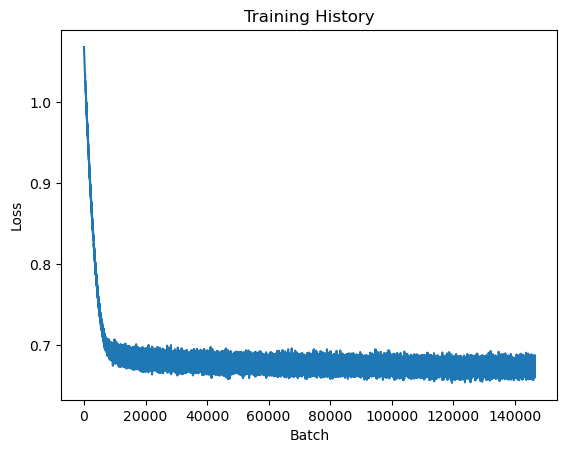

In [5]:
#plot training history
plt.plot(history['training'])
plt.title("Training History")
plt.ylabel("Loss")
plt.xlabel("Batch")
#limit x axis
#plt.xlim(0, 1000)
plt.show()

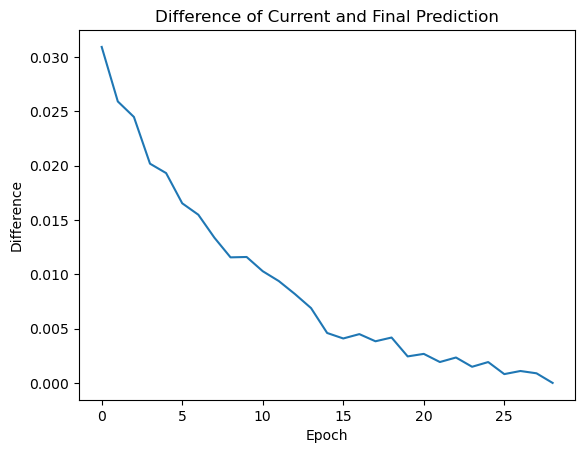

In [6]:
#plot difference of current and final prediction

#initialize difference array
predictions = np.array(history['prediction'][1:])
difference = np.zeros((predictions.shape[0], predictions.shape[1]))
#calculate difference
for i in range(predictions.shape[0]):
    difference[i] = np.abs(predictions[i] - predictions[-1])
#average over columns
difference = np.mean(difference, axis=1)
#plot difference
plt.plot(difference)
plt.title("Difference of Current and Final Prediction")
plt.ylabel("Difference")
plt.xlabel("Epoch")
plt.show()

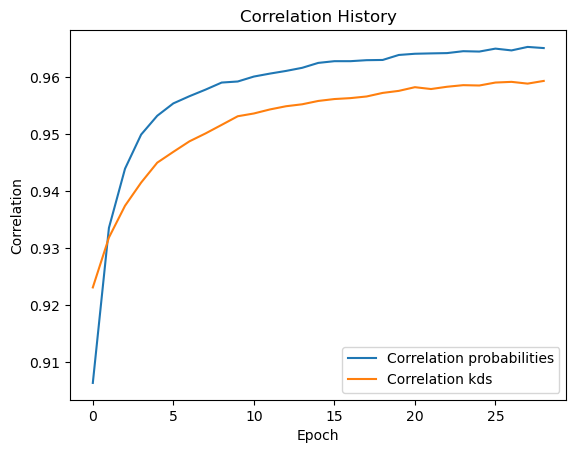

In [7]:
#plot correlation history rows as lines
plt.plot(history['correlation_probs'][1:], label='Correlation probabilities')
plt.plot(history['correlation_kds'][1:], label='Correlation kds')
plt.legend()
plt.title("Correlation History")
plt.ylabel("Correlation")
plt.xlabel("Epoch")
plt.show()

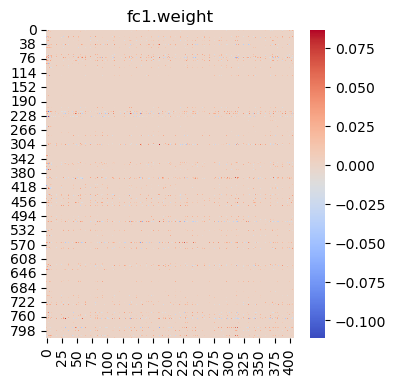

max weight value:  0.08691187
min weight value:  -0.11107791
number of pruned weights:  273301
number of non zero weights:  59627


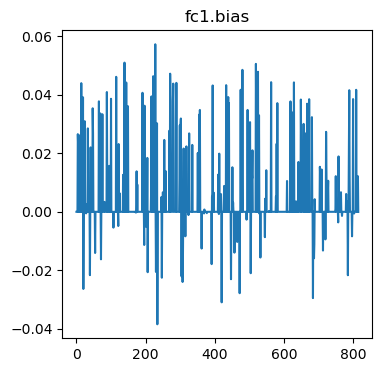

max bias value:  0.057240892
min bias value:  -0.038427003
number of pruned biases:  606
number of non zero biases:  210


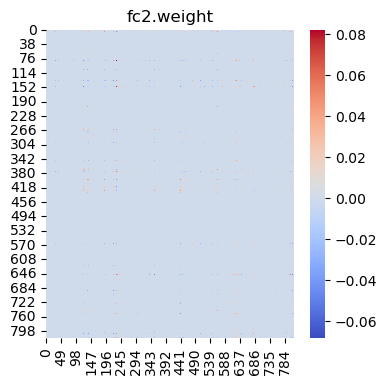

max weight value:  0.082064606
min weight value:  -0.06795928
number of pruned weights:  655688
number of non zero weights:  10168


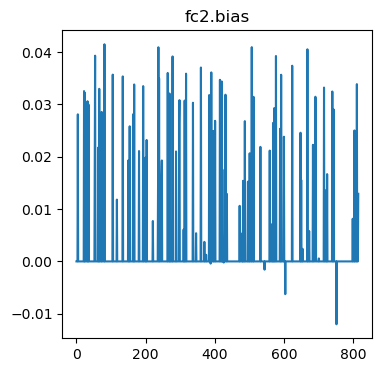

max bias value:  0.04148797
min bias value:  -0.01201067
number of pruned biases:  721
number of non zero biases:  95


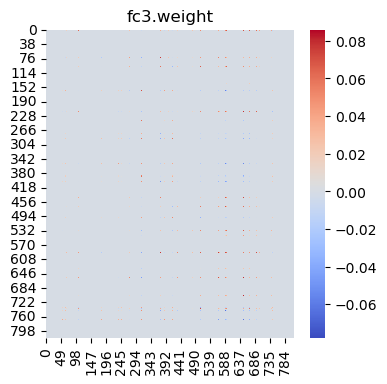

max weight value:  0.085938804
min weight value:  -0.07773907
number of pruned weights:  662130
number of non zero weights:  3726


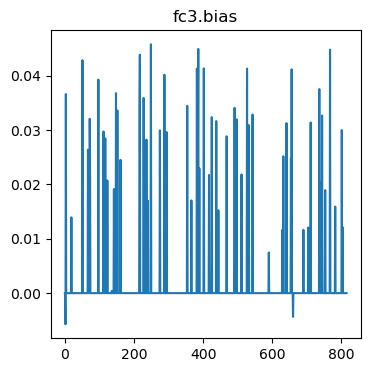

max bias value:  0.04576736
min bias value:  -0.005726803
number of pruned biases:  751
number of non zero biases:  65


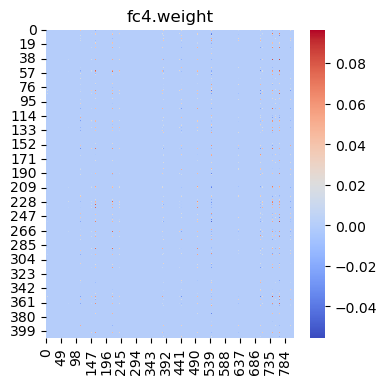

max weight value:  0.09661858
min weight value:  -0.055450168
number of pruned weights:  327694
number of non zero weights:  5234


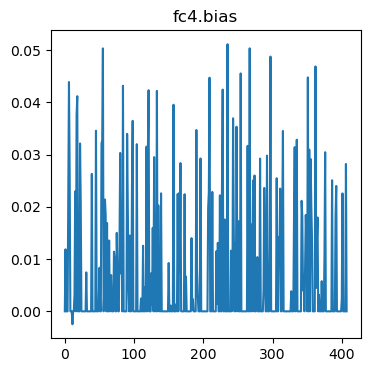

max bias value:  0.051125396
min bias value:  -0.0024783898
number of pruned biases:  260
number of non zero biases:  148


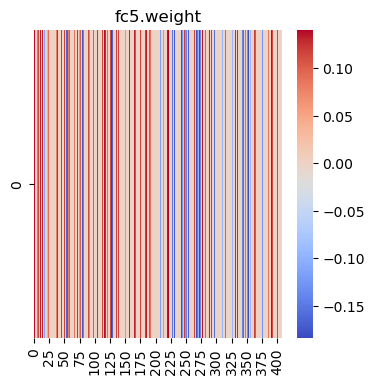

max weight value:  0.14073876
min weight value:  -0.18384118
number of pruned weights:  258
number of non zero weights:  150


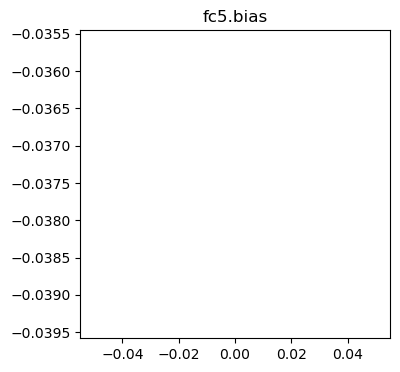

max bias value:  -0.037517752
min bias value:  -0.037517752
number of pruned biases:  0
number of non zero biases:  1


In [8]:
for name, param in model.named_parameters():
    #if weight is not a bias
    if 'bias' not in name:
        #reshape weights to 2d array
        weight = param.data.cpu().numpy().reshape(param.data.cpu().numpy().shape[0], param.data.cpu().numpy().shape[1])
        #plot heatmap of weights
        plt.figure(figsize=(4,4))
        sns.heatmap(weight, cmap='coolwarm')
        plt.title(name)
        plt.show()

        print('max weight value: ', np.max(weight))
        print('min weight value: ', np.min(weight))
        #print('number of weights: ', weight.size)
        print('number of pruned weights: ', np.sum(weight == 0))
        print('number of non zero weights: ', np.sum(weight != 0))

    else:
        bias = param.data.cpu().numpy()
        #plot histogram of biases
        plt.figure(figsize=(4,4))
        sns.lineplot(bias.flatten())
        plt.title(name)
        plt.show()
 
        print('max bias value: ', np.max(bias))
        print('min bias value: ', np.min(bias))
        #print('number of biases: ', bias.size)
        print('number of pruned biases: ', np.sum(bias == 0))
        print('number of non zero biases: ', np.sum(bias != 0))

In [9]:
#get percent of parameters pruned
total_params = 0
pruned_params = 0
for param in model.parameters():
    total_params += param.numel()
    pruned_params += np.sum(param.data.cpu().numpy() == 0)
print('percent of parameters pruned: ', pruned_params/total_params)

percent of parameters pruned:  0.9603045331619381


In [10]:
# read in kd values
kds = np.loadtxt(simulation_path+'/secondFromProt1/prot1/single_kds.txt')

#insert 1 at position 0 and then every 3rd position
kds = np.insert(kds, 0, 1)
kds = np.insert(kds, np.arange(4, len(kds), 3), 1)
kds[0:10]

array([1.      , 2.84962 , 1.      , 0.683323, 1.      , 1.      ,
       0.742565, 1.24033 , 1.      , 1.      ])

In [11]:
input_size = len(open(training_path).readline().split(' ')) - 1
predictions = MIMENet.inferSingleProbabilities(model, input_size)

100%|██████████| 400/400 [00:00<00:00, 564.49it/s]


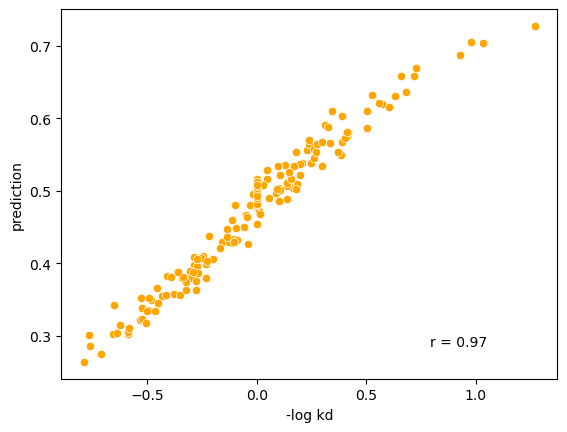

In [12]:
#two plots -log kd vs predictionZeroConc and predictionOneConc
sns.scatterplot(x=-np.log10(kds), y=predictions, color='orange')
plt.xlabel('-log kd')
plt.ylabel('prediction')
#show correlation coefficient in bottom right corner
plt.text(0.8, 0.1, 'r = '+str(np.round(np.corrcoef(-np.log10(kds), predictions)[0,1], 2)), ha='center', va='center', transform=plt.gca().transAxes)
plt.show()

Text(0, 0.5, 'z score')

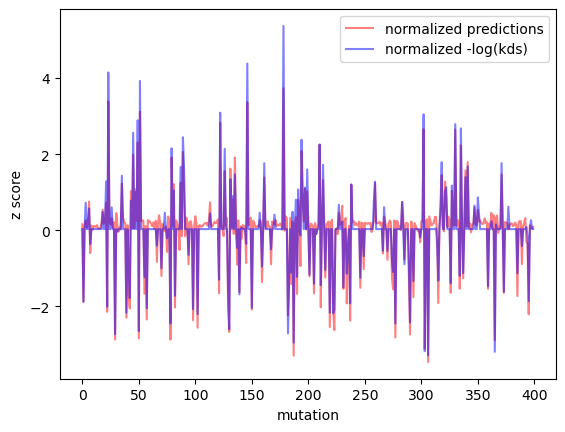

In [13]:
#z score predictions
predictionsNorm = (predictions - np.mean(predictions))/np.std(predictions)

#z score -np.log(kds)
kdsNorm = (-np.log10(kds) - np.mean(-np.log10(kds)))/np.std(-np.log10(kds))

#lineplot of z score predictions
sns.lineplot(x=np.arange(0, len(predictionsNorm)), y=predictionsNorm, label='normalized predictions', color='red', alpha=0.5)
sns.lineplot(x=np.arange(0, len(kdsNorm)), y=kdsNorm, label='normalized -log(kds)', color='blue', alpha=0.5)
plt.xlabel('mutation')
plt.ylabel('z score')

(0.0, 1.0)

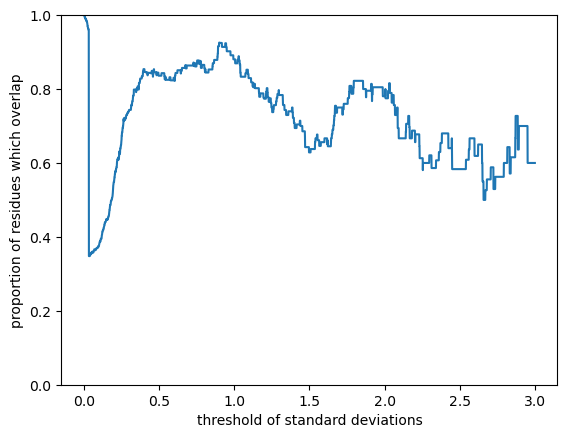

In [14]:
#check overlap of normalized predictions and normalized -log(kds) for absolute value greater than 0.5
#loop over threshold values
overlapProportions = []
for threshold in np.arange(0, 3, 0.001):
    #get indices of scaled predictions and scaled -log(kds) that are greater than the threshold
    indices = np.where(np.abs(predictionsNorm) > threshold)[0]
    indices2 = np.where(np.abs(kdsNorm) > threshold)[0]
    #get the intersection of the two sets of indices
    overlap = np.intersect1d(indices, indices2)
    #get the proportion of the intersection to the union of the two sets of indices
    overlapProportions.append(len(overlap)/len(np.union1d(indices, indices2)))

#plot overlapProportions
sns.lineplot(x=np.arange(0, 3, 0.001), y=overlapProportions)
plt.xlabel('threshold of standard deviations')
plt.ylabel('proportion of residues which overlap')
plt.ylim(0, 1)

In [15]:
# read in kd values
kds = np.loadtxt(simulation_path+'/secondFromProt1/prot1/single_kds.txt')
print(kds.shape)
print(kds[0:10])

(300,)
[2.84962  1.       0.683323 1.       0.742565 1.24033  1.       1.
 1.       1.      ]


In [16]:
#predict kds
input_size = len(open(training_path).readline().split(' ')) - 1
predicted_kds = MIMENet.inferSingleKds(model, input_size)

100%|██████████| 100/100 [00:00<00:00, 283.00it/s]


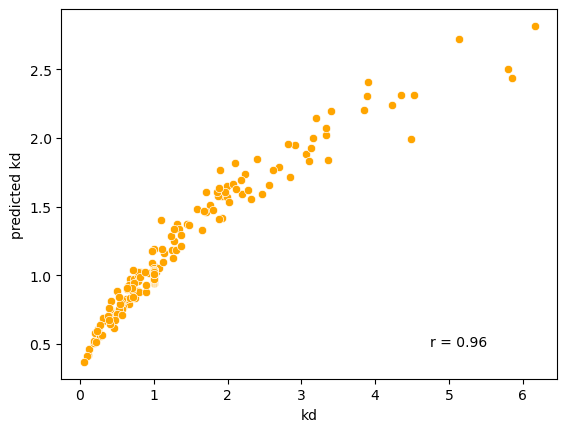

In [17]:
#plot predicted kds vs actual kds
sns.scatterplot(x=kds, y=predicted_kds, color='orange')
plt.xlabel('kd')
plt.ylabel('predicted kd')
#show correlation coefficient in bottom right corner
plt.text(0.8, 0.1, 'r = '+str(np.round(np.corrcoef(kds, predicted_kds)[0,1], 2)), ha='center', va='center', transform=plt.gca().transAxes)
plt.show()

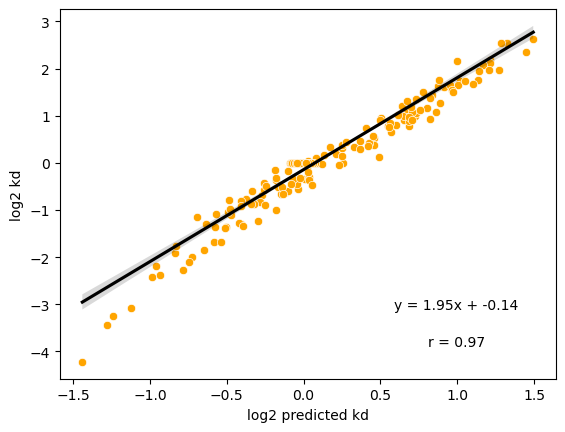

In [18]:
#plot log2 predicted kd vs log2 kd
sns.scatterplot(x=np.log2(predicted_kds), y=np.log2(kds), color='orange')
plt.xlabel('log2 predicted kd')
plt.ylabel('log2 kd')
#show correlation coefficient in bottom right corner
plt.text(0.8, 0.1, 'r = '+str(np.round(np.corrcoef(np.log2(predicted_kds), np.log2(kds))[0,1], 2)), ha='center', va='center', transform=plt.gca().transAxes)
#show line of best fit
sns.regplot(x=np.log2(predicted_kds), y=np.log2(kds), scatter=False, color='black')
#show regression line equation
plt.text(0.8, 0.2, 'y = '+str(np.round(np.polyfit(np.log2(predicted_kds), np.log2(kds), 1)[0], 2))+'x + '+str(np.round(np.polyfit(np.log2(predicted_kds), np.log2(kds), 1)[1], 2)), ha='center', va='center', transform=plt.gca().transAxes)
plt.show()

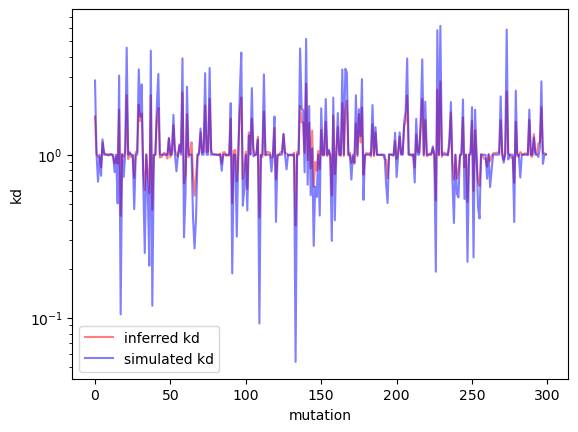

In [19]:
#lienplot of predicted kds
sns.lineplot(x=np.arange(len(predicted_kds)), y=predicted_kds, label='inferred kd', color='red', alpha=0.5)
#lineplot of actual kds
sns.lineplot(x=np.arange(len(kds)), y=kds, label= 'simulated kd', color='blue', alpha=0.5)
plt.xlabel('mutation')
plt.ylabel('kd')
plt.legend()
#log scale on y axis
plt.yscale('log')
plt.show()

In [20]:
input_size = len(open(training_path).readline().split(' ')) - 1
predictionsPairwise = MIMENet.inferPairwiseKds(model, input_size)
probabilitiesPairwise = MIMENet.inferPairwiseProbabilities(model, input_size)

100%|██████████| 100/100 [00:22<00:00,  4.36it/s]


In [21]:
#load pairwise kd values
kdsPairwise = np.loadtxt(simulation_path+'/secondFromProt1/prot1/pairwise_kds.txt')
kdsPairwise[0:10]

array([2.84962 , 5.44819 , 8.7685  , 1.      , 0.742565, 1.24033 ,
       0.683323, 0.507412, 2.16152 , 2.84962 ])

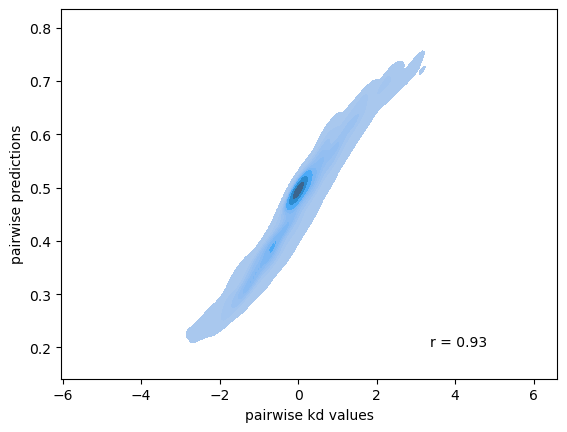

In [22]:
#get correlation coefficient
np.corrcoef(-np.log(kdsPairwise), probabilitiesPairwise)[0,1]
#density plot pairwise predictions vs pairwise kd values
sns.kdeplot(x=-np.log(kdsPairwise), y=probabilitiesPairwise, fill=True)
plt.xlabel('pairwise kd values')
plt.ylabel('pairwise predictions')
#show correlation coefficient in bottom right corner
plt.text(0.8, 0.1, 'r = '+str(np.round(np.corrcoef(-np.log(kdsPairwise), probabilitiesPairwise)[0,1], 2)), ha='center', va='center', transform=plt.gca().transAxes)
plt.show()

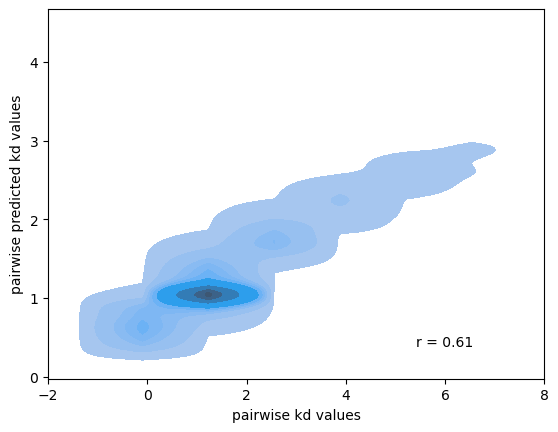

In [23]:
#get correlation coefficient
np.corrcoef(kdsPairwise, predictionsPairwise)[0,1]
#density plot pairwise predictions vs pairwise kd values
sns.kdeplot(x=kdsPairwise, y=predictionsPairwise, fill=True)
plt.xlabel('pairwise kd values')
plt.ylabel('pairwise predicted kd values')
#show correlation coefficient in bottom right corner
plt.text(0.8, 0.1, 'r = '+str(np.round(np.corrcoef(kdsPairwise, predictionsPairwise)[0,1], 2)), ha='center', va='center', transform=plt.gca().transAxes)
plt.xlim(-2, 8)
plt.show()

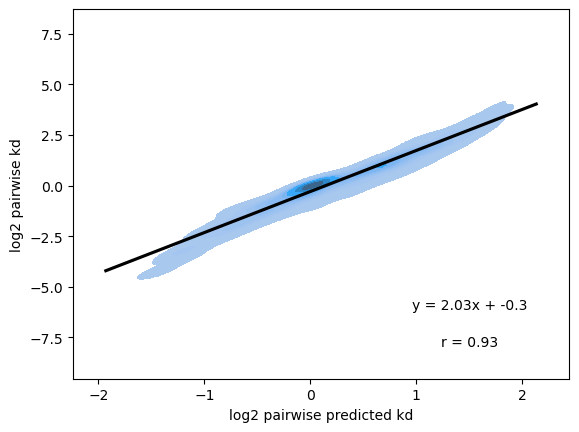

In [24]:
#plot log2 pairwise predicted kd vs log2 pairwise kd
sns.kdeplot(x=np.log2(predictionsPairwise), y=np.log2(kdsPairwise), fill=True)
plt.xlabel('log2 pairwise predicted kd')
plt.ylabel('log2 pairwise kd')
#show correlation coefficient in bottom right corner
plt.text(0.8, 0.1, 'r = '+str(np.round(np.corrcoef(np.log2(predictionsPairwise), np.log2(kdsPairwise))[0,1], 2)), ha='center', va='center', transform=plt.gca().transAxes)
#show line of best fit
sns.regplot(x=np.log2(predictionsPairwise), y=np.log2(kdsPairwise), scatter=False, color='black')
#show regression line equation
plt.text(0.8, 0.2, 'y = '+str(np.round(np.polyfit(np.log2(predictionsPairwise), np.log2(kdsPairwise), 1)[0], 2))+'x + '+str(np.round(np.polyfit(np.log2(predictionsPairwise), np.log2(kdsPairwise), 1)[1], 2)), ha='center', va='center', transform=plt.gca().transAxes)
plt.show()

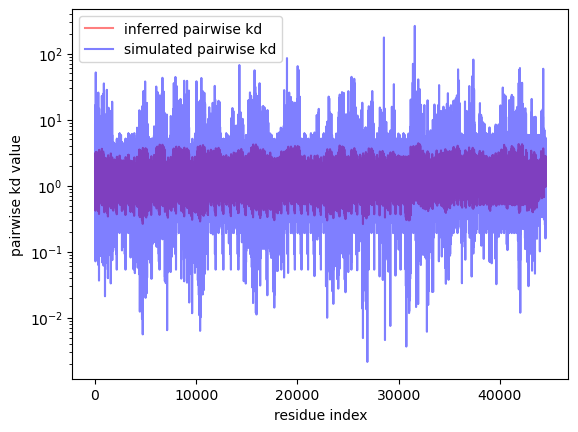

In [39]:
#lineplot of pairwise predictions
sns.lineplot(x=np.arange(0, len(predictionsPairwise)), y=predictionsPairwise, label='inferred pairwise kd', color='red', alpha=0.5)
#lineplot of pairwise kd values
sns.lineplot(x=np.arange(0, len(kdsPairwise)), y=kdsPairwise, label='simulated pairwise kd', color='blue', alpha=0.5)
plt.xlabel('residue index')
plt.ylabel('pairwise kd value')
#log scale y axis
plt.yscale('log')
plt.legend()
plt.show()

In [26]:
input_size = len(open(training_path).readline().split(' ')) - 1
epistasisPairwise = MIMENet.inferEpistasis(model, input_size)
print(epistasisPairwise[0:10])
print(len(epistasisPairwise))

100%|██████████| 100/100 [01:18<00:00,  1.27it/s]

[0.9750496411787806, 0.9711654536121803, 1.0152205562644845, 1.003844589195905, 0.9978185069293355, 0.9797974600896485, 1.0041031275906676, 0.9969274136298955, 0.9809045276061459, 0.9994934774256933]
44550


In [27]:
#load pairwise epistasis values
epistasisPairwiseSim = np.loadtxt(simulation_path+'/secondFromProt1/prot1/pairwise_epistasis.txt')
print(epistasisPairwiseSim[0:10])
print(len(epistasisPairwiseSim))

[1.       0.388391 0.403087 1.       1.       1.       1.       1.
 0.392107 1.      ]
44550


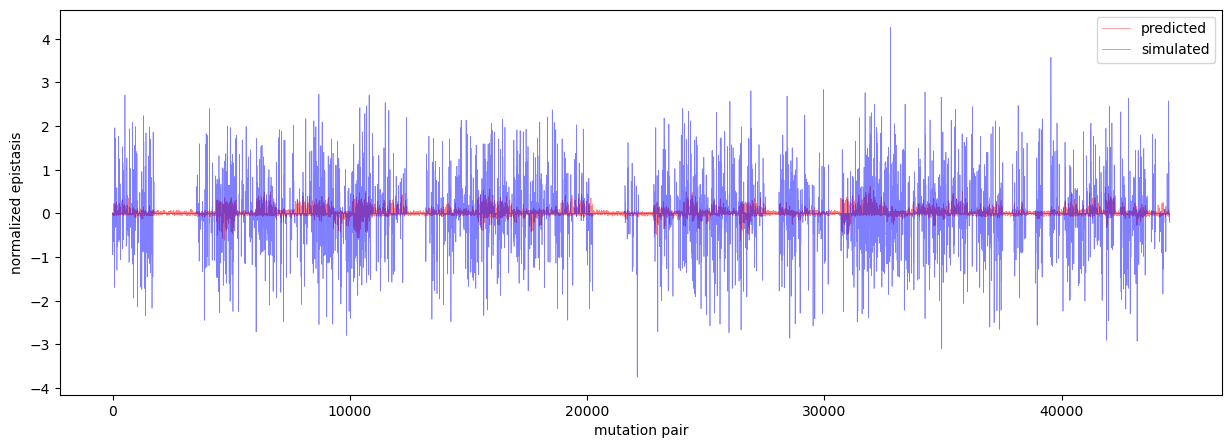

In [36]:
#log transform epistasis values
epistasisPairwiseLog = np.log(epistasisPairwise)
epistasisPairwiseSimLog = np.log(epistasisPairwiseSim)

#normalize predictions and simulated epistasis values
epistasisPairwiseNorm = ((epistasisPairwise - np.mean(epistasisPairwise))/np.max(epistasisPairwise))
epistasisPairwiseSimNorm = ((epistasisPairwiseSim - np.mean(epistasisPairwiseSim))/np.max(epistasisPairwiseSim))

#normalize log transformed predictions and simulated epistasis values
epistasisPairwiseLogNorm = ((epistasisPairwiseLog - np.mean(epistasisPairwiseLog))/np.max(epistasisPairwiseLog))
epistasisPairwiseSimLogNorm = ((epistasisPairwiseSimLog - np.mean(epistasisPairwiseSimLog))/np.max(epistasisPairwiseSimLog))

#center predictions and simulated epistasis values
epistasisPairwiseCenter = (epistasisPairwise - np.mean(epistasisPairwise))
epistasisPairwiseSimCenter = (epistasisPairwiseSim - np.mean(epistasisPairwiseSim))

#lineplot of z score predictions
sns.lineplot(x=np.arange(0, len(epistasisPairwise)), y=epistasisPairwiseLog, label='predicted', color='red', alpha=0.5, linewidth=.5)
sns.lineplot(x=np.arange(0, len(epistasisPairwiseSim)), y=epistasisPairwiseSimLog, label='simulated', color='blue', alpha=0.5, linewidth=.5)
plt.xlabel('mutation pair')
plt.ylabel('normalized epistasis')
#increase fig size
plt.gcf().set_size_inches(15, 5)
#limit y axis
#plt.ylim(-.7, .7)

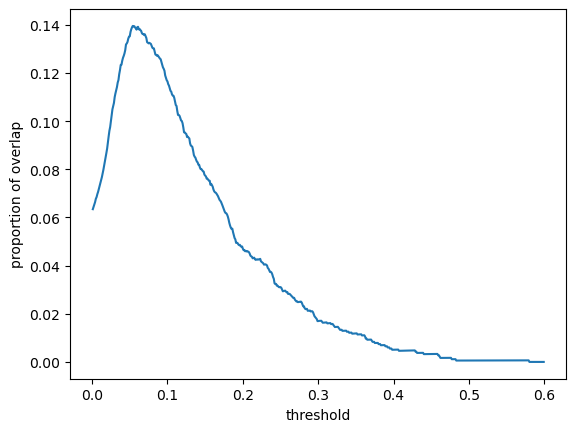

In [37]:
#check overlap of normalized epistasis of simulations and predictions
#loop over threshold values
overlapProportions = []
for threshold in np.arange(0.001, 0.6, 0.001):
    #get indices of scaled predictions and scaled -log(kds) that are greater than the threshold
    indices = np.where(np.abs(epistasisPairwiseSimLog) > threshold)[0]
    indices2 = np.where(np.abs(epistasisPairwiseLog) > threshold)[0]
    #get the intersection of the two sets of indices
    overlap = np.intersect1d(indices, indices2)
    #get the proportion of the intersection to the union of the two sets of indices
    overlapProportions.append(len(overlap)/len(np.union1d(indices, indices2)))

#plot overlap proportion vs threshold
plt.plot(np.arange(0.001, 0.6, 0.001), overlapProportions)
plt.xlabel('threshold')
plt.ylabel('proportion of overlap')
plt.show()

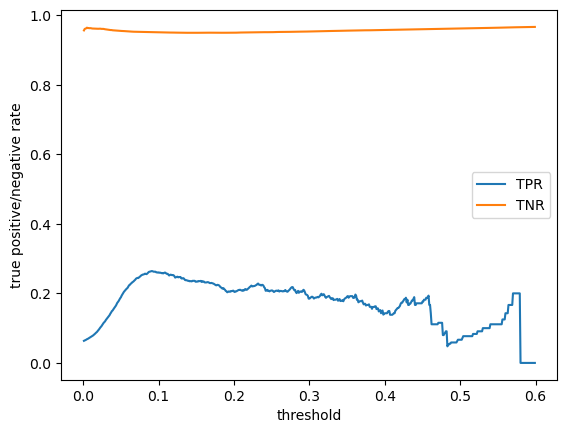

In [38]:
#check overlap of normalized epistasis of simulations and predictions
#loop over threshold values
truePositives = []
trueNegatives = []
for threshold in np.arange(0.001, 0.6, 0.001):
    #get indices of scaled predictions and scaled -log(kds) that are greater than the threshold
    indices = np.where(np.abs(epistasisPairwiseLog) > threshold)[0]
    #check for indices if simulated epistasis is also greater than threshold
    overlap = np.where(np.abs(epistasisPairwiseSimLog[indices]) > threshold)[0]
    #in what proportion of the indices is the simulated epistasis also greater than threshold
    if len(indices) == 0:
        truePositives.append(0)
    else: truePositives.append(len(overlap)/len(indices))

    #get indices of scaled predictions and scaled -log(kds) that are less than the threshold
    indices = np.where(np.abs(epistasisPairwiseLog) < threshold)[0]
    #check for indices if simulated epistasis is also less than threshold
    overlap = np.where(np.abs(epistasisPairwiseSimLog[indices]) < threshold)[0]
    #in what proportion of the indices is the simulated epistasis also less than threshold
    if len(indices) == 0:
        trueNegatives.append(0)
    else: trueNegatives.append(len(overlap)/len(indices))

#plot true positive rate vs threshold
plt.plot(np.arange(0.001, 0.6, 0.001), truePositives, label='TPR')
#plot true negative rate vs threshold
plt.plot(np.arange(0.001, 0.6, 0.001), trueNegatives, label='TNR')
plt.xlabel('threshold')
plt.ylabel('true positive/negative rate')
plt.legend()
plt.show()